<h1>Derivative Illustration</h1>
<p>This notebook gives an interactive illustration of a function's derivative.  In addition to an interactive graph which shows a function's derivative, this notebook is an example of using interacive widgets.  Some good resources I used in developing this are:
<ul>
<li>A blog post on <a href=https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/>Building Interactive Dashboards with Jupyter</a></li>
<li>The <a href=https://github.com/ipython/ipywidgets>ipywidgets</a> documentation on <a href=https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html>Using Interact</a></li>
<li>A <a href=http://earthpy.org/pyncview_pm.html>good description</a> of using interact for data analysis.</li>
</ul>
In a future notebook, we will explore <a href=https://github.com/jupyter-incubator/dashboards>Jupyter Dashboards</a> as well which would help the layout of the interactive graph.
</p>
<h2>Initialization</h2>
<p>Below are the imports for the notebook.  Note that we are setting the matplotlib backend to 'notebook' with the <code>%matplotlib notebook</code> magic function.  This is somewhat described in the <a href=http://ipython.readthedocs.io/en/stable/interactive/plotting.html>ipython plotting documentation</a>.  The derivative function is described in the <a href=https://docs.scipy.org/doc/scipy-0.18.0/reference/generated/scipy.misc.derivative.html>scipy documentation</a></p>

In [1]:
import numpy as np
from scipy.misc import derivative

%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt

import ipywidgets
from ipywidgets import widgets #interact, interactive, widgets
from IPython.display import display

In [2]:
left=0
right = 4*np.pi
NumSteps = 100

BoxWidth = "100%"
LRLayout=ipywidgets.Layout(width='50%')

point_widget = widgets.FloatSlider(min=left, max=right, step=(right-left)/NumSteps,
                                   value=(right-left)/2, description="Point",
                                   layout=ipywidgets.Layout(width='100%'))

left_widget  = widgets.FloatSlider(min=-10., max=10., step=.5, description="Left", value=left, layout=LRLayout)
right_widget = widgets.FloatSlider(min=0.,   max=20., step=.5, description="Right", value=right, layout=LRLayout)
LRWidget= ipywidgets.Box(children=[left_widget,right_widget],
                         layout=ipywidgets.Layout(display='flex',flex_flow="row",width='100%'))


DIBox=ipywidgets.Box(children=[LRWidget,point_widget],
                     layout=ipywidgets.Layout(display='flex', flex_flow='column', align_items = 'stregtch', width=BoxWidth))

<IPython.core.display.Javascript object>


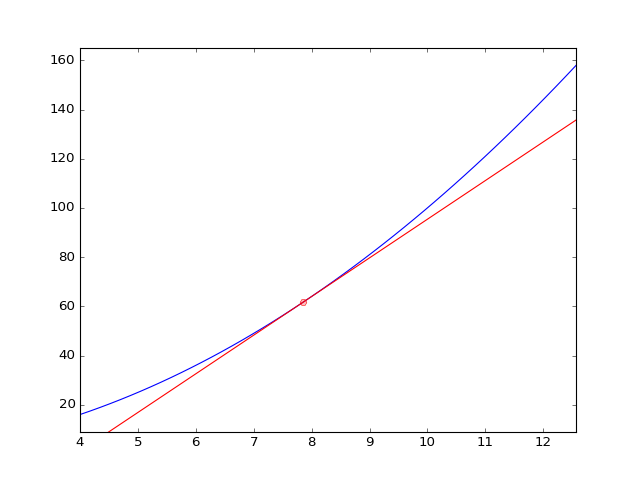

In [3]:
def f(x):
    return x**2

VerAxisR = 1.1

MyFig, MyAxes = plt.subplots()
MyAxes.set_xlim(( left_widget.value, right))
MyAxes.set_ylim((-1, 1))
MyLineFunction, = MyAxes.plot([], [], label='Function f')
MyLinePoint,  = MyAxes.plot([], [], marker='H', ls='none', MFC=(1,0,0,.25),
                            mec=(1,0,0,1), label='Point')
MyLineDerivative, = MyAxes.plot([], [], label='Derivative')

def Updatef(left,right):
    XFuntionValues = np.linspace(left,right)
    YFunctionValues = [f(x) for x in XFuntionValues]
    MyLineFunction.set_data(XFuntionValues,YFunctionValues)
    high=max(YFunctionValues)
    low =min(YFunctionValues)
    ave=(high+low)/2
    h=VerAxisR*(high - low)/2
    MyAxes.set_ylim((ave-h, ave+h))
    
def UpdatePoint(x):
    MyLinePoint.set_data([x],[f(x)])
    m=derivative(f, x, order=5)
    b=f(x) - m*x
    MyLineDerivative.set_data([left_widget.value, right_widget.value],
                              [m*left_widget.value+b, m*right_widget.value+b])

def PointChange(ChangeDict):
    UpdatePoint(point_widget.value)
    
def LRChange(ChangeDict):
    Updatef(left_widget.value,right_widget.value)
    MyAxes.set_xlim(( left_widget.value, right_widget.value))
    UpdatePoint(point_widget.value)
    point_widget.step=(point_widget.max-point_widget.min)/NumSteps
    
def LChange(ChangeDict):
    point_widget.min=left_widget.value
    if point_widget.value < left_widget.value:
        point_widget.value = left_widget.value
        UpdatePoint(point_widget.value)
    LRChange(ChangeDict)    

def RChange(ChangeDict):
    point_widget.max=right_widget.value
    if point_widget.value > right_widget.value:
        point_widget.value = right_widget.value
        UpdatePoint(point_widget.value)
    LRChange(ChangeDict)    

point_widget.observe(PointChange, names='value')
left_widget.observe (LChange,    names='value')
right_widget.observe(RChange,    names='value')
UpdatePoint(point_widget.value)
Updatef(left_widget.value,right_widget.value)
display(DIBox)

In [ ]:
plt.draw()

In [ ]:
display(plt)

In [ ]:
import IPython
print(IPython.display.set_matplotlib_formats.__doc__)